In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 188s 1s/step - loss: 0.6268 - acc: 0.6361 - val_loss: 0.7710 - val_acc: 0.5642
Epoch 2/10
157/157 [==============================] - 150s 953ms/step - loss: 0.4028 - acc: 0.8311 - val_loss: 0.3939 - val_acc: 0.8424
Epoch 3/10
157/157 [==============================] - 149s 946ms/step - loss: 0.2995 - acc: 0.8806 - val_loss: 0.3417 - val_acc: 0.8668
Epoch 4/10
157/157 [==============================] - 153s 975ms/step - loss: 0.2443 - acc: 0.9068 - val_loss: 0.3569 - val_acc: 0.8444
Epoch 5/10
157/157 [==============================] - 173s 1s/step - loss: 0.2084 - acc: 0.9232 - val_loss: 0.4566 - val_acc: 0.7824
Epoch 6/10
157/157 [==============================] - 232s 1s/step - loss: 0.1600 - acc: 0.9420 - val_loss: 0.3472 - val_acc: 0.8758
Epoch 7/10
157/157 [==============================] - 314s 2s/step - loss: 0.1324 - acc: 0.9542 - val_loss: 0.4211 - val_acc: 0.8380
Epoch 8/10
157/157 [==============================] - 384s 2

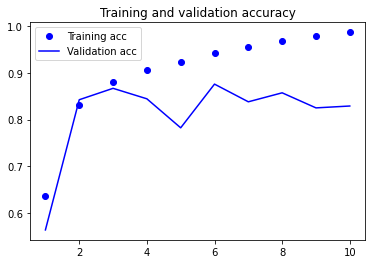

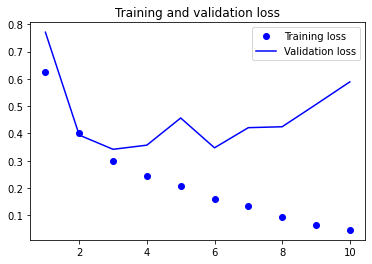

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()